In [20]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
# Global variables
PROCESSED_DIR = "PROCESSED"
OUTPUT_NAME = "House_Predicted"

In [21]:
# Get today date
todays_date = datetime.today()
year = todays_date.year
# Get the path to read input from
path = f"PREPARED/{year}/prepared_data_{year}.csv"
# Check whether the specified file exists or not
isExist = os.path.isfile(path)
if not isExist:
    sys.exit("The file/directory doesn't exist")

# Read DataFrame from path
df = pd.read_csv(path, sep=';')

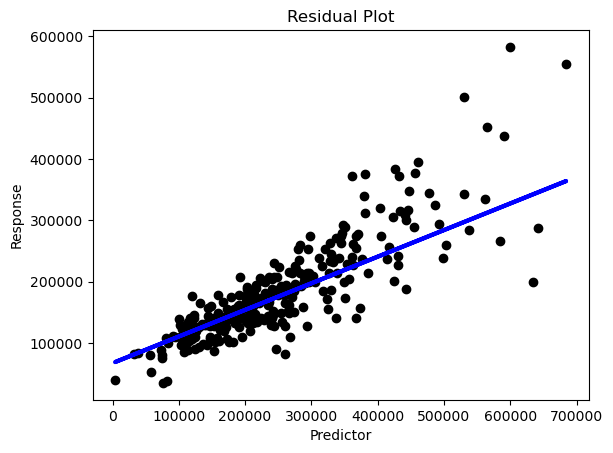

Prediction Error: 0.13942090023873832


In [22]:
# Transform data into 2D
x = ((df["TotalLivingArea"] * 1.6) + (df["TotalBsmtSF"] * 0.6)) * (df["OverallQual"] * 3) * (df["OverallCond"] * 0.8)
y = df["SalePrice"]

# Split the data on 2 parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Create linear regression object 
reg = LinearRegression()
reg.fit(x_train.values.reshape(-1,1), y_train)
y_pred = reg.predict(x_test.values.reshape(-1,1))

# Visualize the results 
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.title("Residual Plot")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.show()

# Create result_df
result_df = pd.DataFrame()
result_df["HouseIndex"] = x_test.index
result_df["PredictedPrice"] = y_pred
result_df["SellPrice"] = y_test
result_df["PredictionError"] = abs(1 - (y_pred / y_test))

# Get mean prediction error
mean_prediction_error = result_df["PredictionError"].mean()
print(f"Prediction Error: {mean_prediction_error}")

In [26]:
# Save processed data to csv

# Set the path to save
path = f"{PROCESSED_DIR}/{year}"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(path)

# Save merged DataFrame to CSV with ; separator without index column
df.to_csv(f"{path}/{OUTPUT_NAME}.csv", sep=';', index=False)